In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from skimage.io import imread

<p style = "font-size: 21.5px; color: green; text-align: center" > Processing Images

<p style = "font-size: 15px; color: green; text-align: center" > by Irina Nedyalkova

Images are telling stories quickly and colorful, thus there is not so much space for imagination. Words are telling stories in a slow manner but with a much more expressiveness. In this paper we will dive into image processing and the vast ocean needed for computer vision, robotics and other detection fields. Machines do not see like we humans do, so a Data Scientist has to make images readable for a machine learning algorithm. We could transform one image or thousands of images at a time using image processing libraries in Python. That an image is a matrix of pixels, the Red-Green-Blue channels, histograms and greyscale, I've had stated in my other image processing works, so here I will go more in detail about the libraries, the tools and some tasks.

<p style = "font-size: 17px; color: green" > Image morphology: looking for shapes

Image morphology is an image processing algorithm based on shapes - each pixel in the image is adjusted through the value of other pixels in its neighborhood. By choosing the size and shape of the neighborhood, we can construct a morphological operation that is sensitive to specific shapes in the input image. Actually, we need two inputs - one is our original image, the other is called structuring element (like a kernel in a convolutional neural network) which decides the nature of operation. The word $Morphology$ generally represents a branch of biology that deals with the form and structure of animals and plants. However, we use the same term as "mathematical morphology" to extract image components like regional shape, boundaries and more.

Terminologies in an image morphology:
- Structuring Element - a matrix (or a template) used to travel across (or through) the image;
- Fit - all the pixels in the structuring element cover the pixels of the object;
- Hit - at least one of the pixels in the structuring element cover the pixels of the object;
- Miss - no pixel in the structuring element covers the pixels of the object.

The structuring element is moved across every pixel in the original image to give a pixel in a new processed image. The value of this new pixel depends on the morphological operation performed. The two most widely used operations are Erosion and Dilation or performed together as Opening and Closing process:

Erosion (damaged, removed) shrinks the image pixels or removes pixels on object boundaries. It could split apart or give new shape to objects.

In [4]:
def pixel_output_erosion(fit):          # if it fits, we have output = 1
    if fit == 1:
        return 1
    else:
        return 0                  # it is eroded when made to zero, output = 0

In [5]:
pixel_output_erosion(1)

1

Dilation (wider, larger) expands the image pixels or adds pixels on object boundaries. It could help repairing breaks or shapes.

In [6]:
def pixel_output_dilation(hit):      # if we have some covering pixels, we have output = 1
    if hit == 1:
        return 1
    else:
        return 0

In [7]:
pixel_output_dilation(0)

0

The structuring element is a matrix of pixels, each with a value of $0$ (zero) or $1$ (one), and the pattern of the ones and zeros specifies the shape of it. The number of pixels added or removed from the object depends on the shape and size of this structuring element. 

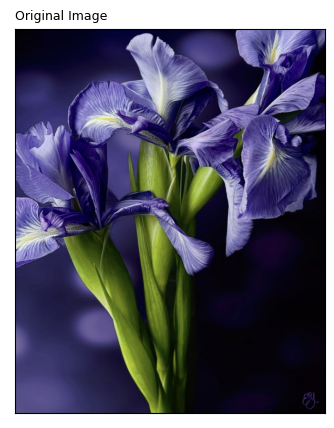

In [8]:
iris = plt.imread("iris_midnight.jpg")
plt.figure(figsize = (4, 6))
plt.xticks([])
plt.yticks([])
plt.title("Original Image", size = 9, pad = 7, loc = "left")
plt.imshow(iris)
plt.show()

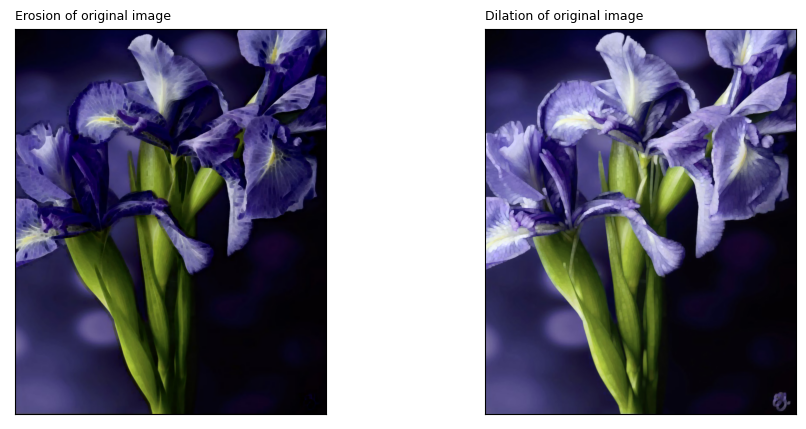

In [9]:
# TIP: first do operations one by one, then combine as subplots

plt.figure(figsize = (3, 5))
plt.subplots_adjust(right = 3)                      # space between pictures

structure_element = np.ones((5, 5), np.uint8)          # kernel for both operations

plt.subplot(1, 2, 1)
erosion_iris = cv2.erode(iris, structure_element, iterations = 1)
plt.xticks([])
plt.yticks([])
plt.title("Erosion of original image", size = 9, pad = 7, loc = "left")
plt.imshow(erosion_iris)

plt.subplot(1, 2, 2)
dilation_iris = cv2.dilate(iris, structure_element, iterations = 1)
plt.xticks([])
plt.yticks([])
plt.title("Dilation of original image", size = 9, pad = 7, loc = "left")
plt.imshow(dilation_iris)

plt.show()

Below, Morphological Gradient, the difference between erosion and dilation of the image. It detects the presence of an edge:

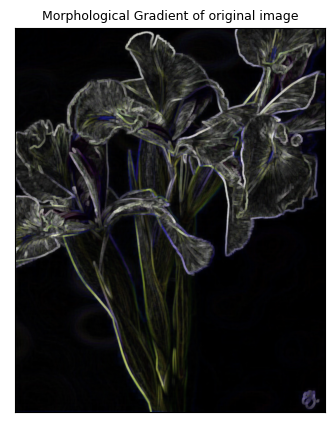

In [10]:
plt.figure(figsize = (4, 6))
gradient_iris = cv2.morphologyEx(iris, cv2.MORPH_GRADIENT, structure_element)
plt.xticks([])
plt.yticks([])
plt.title("Morphological Gradient of original image", size = 9)
plt.imshow(gradient_iris)
plt.show()

Opening is just another name of Erosion followed by Dilation and Closing is Dilation followed by Erosion:

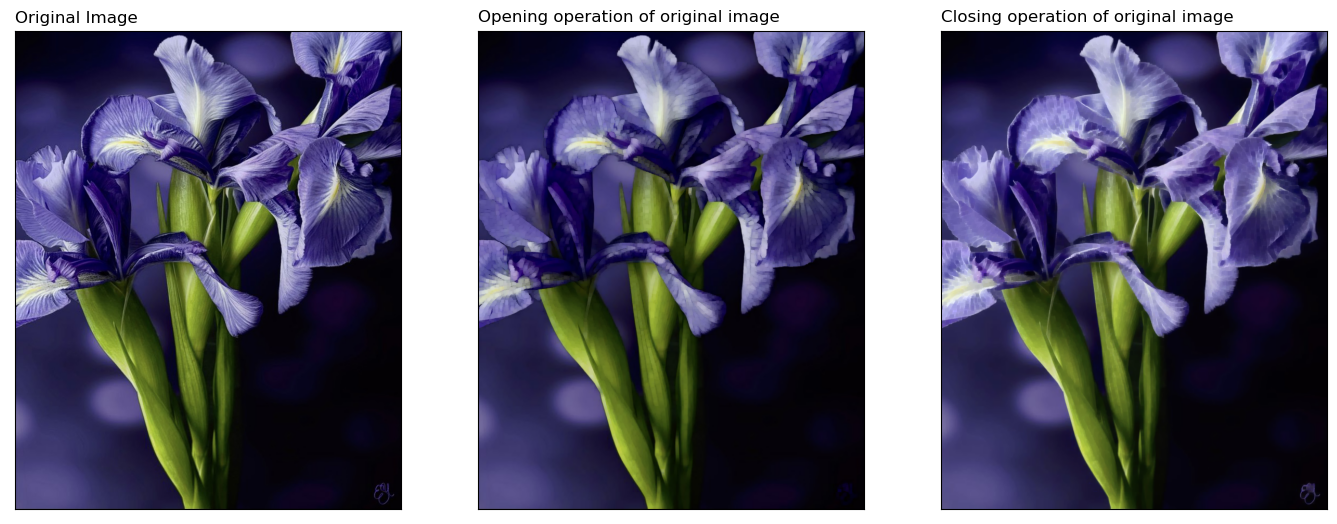

In [11]:
# TIP: first do operations one by one, then combine as subplots

plt.figure(figsize = (7, 9))
plt.subplots_adjust(right = 2)

plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.title("Original Image", size = 12, loc = "left")
plt.imshow(iris)

plt.subplot(1, 3, 2)
opening_iris = cv2.morphologyEx(iris, cv2.MORPH_OPEN, structure_element)
plt.xticks([])
plt.yticks([])
plt.title("Opening operation of original image", size = 12, pad = 7, loc = "left")
plt.imshow(opening_iris)

plt.subplot(1, 3, 3)
closing_iris = cv2.morphologyEx(iris, cv2.MORPH_CLOSE, structure_element)
plt.xticks([])
plt.yticks([])
plt.title("Closing operation of original image", size = 12, pad = 7, loc = "left")
plt.imshow(closing_iris)

plt.show()

Please, find the differences by yourself. An excellent Data Scientist has to choose the best possible operation for the image processing. As we try some, we see if it fits our expectations or not. The more we practice, the more we know which process to choose.

Next: Gaussian :) I have a wonderful sunflower image for it.

______________________________________________________________________________________________________________________________

References:
1. Understanding Morphological Image Processing and Its Operations, article
2. https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
3. Iris picture, @ellensuugh